# 📊 Preparing for Machine Learning:  Knowing and Cleaning Your Data
### 📝 Author: [NICK CROTEAU '23] | 📅 Date: [2023]
### 📝 Author: [mdl] | 📅 Date: [March 2025]
### 📝 Author: [mdl] | 📅 Date: [March 2025] -- added LOG files for each change
### 📝 Author: [mdl, chatGPT-4o] | 📅 Date: [March 2025] -- added (some) LOG files for each change

#### 📌 Description:
This notebook uses Python to perform good practices in a pipeline of techniques for data cleaning in preparation of machine learning algorithms.
A potential next-step with the output of this Notebook would be to proceed to a clustering (unsupervised) and/or classification (supervised) analysis such as classifying (predicting) the class column (0 = healthy, 1 = Onset of Type 2 diabetes).
<p></p>


#### Input: 
`Akime-O_odham-diabetes.data.csv`: This analysis uses the diabetes dataset collected from the [Akimel O'odham or River People community](https://en.wikipedia.org/wiki/Akimel_O%27odham "River People") in Arizona. This .csv file is a canonical data set used in introductory machine learning examples and is typically named using the colonization label "Pima", `pima-peoples-diabetes.data.csv`. We will use Akimel O'odham.

## **TABLE OF CONTENTS**

1. [QUICK NOTES](#quick-notes)
2. [IMPORTS](#imports)
3. [Step 1.0: READ DATA IN FROM CSV FILE](#step-1-read-data-in-from-csv-comma-separated-values-file)
4. [STEP 1.1: PEAK AT DATA](#step-11-peak-at-data)
5. [STEP 1.2: GET DIMENSIONS OF YOUR DATA](#step-12-get-dimensions-of-your-data-52)
6. [WHAT DOES OUR DATA LOOK LIKE RIGHT NOW?](#what-does-our-data-currently-look-like)
7. [STEP 2.0: CLEANING BAD DATA](#step-2-cleaning-bad-data)
8. [STEP 2.1: CLEANING NULL DATA POINTS](#step-21-cleaning-null-data-points)
9. [STEP 2.2 CHECK FOR DUPLICATES](#step-22-check-for-duplicates)
10. [STEP 2.3 DROPPING '0' DATA THAT DOES NOT MAKE SENSE](#step-23-dropping-0-data-that-does-not-make-sense)
11. [STEP 2.4 DETECTING OUTLIERS IN THE DATA SET](#step-24-detecting-outliers-in-the-data-set)
12. [DONE CLEANING](#done-cleaning)
13. [CORRELATIONS BETWEEN ATTRIBUTES](#correlations-between-attributes)
14. [SKEW OF UNIVARIATE DISTRIBUTIONS](#skew-of-univariate-distributions)
15. [UNIVARIATE PLOTS](#univariate-plots)
16. [MULTIVARIATE PLOTS](#multivariate-plots)
17. [SUMMARY OF PLOTS](#summary-of-plots)
18. [STEP 3.0: PREPARE YOUR DATA READY FOR MACHINE LEARNING](#step-30-prepare-your-data-for-machine-learning)
19. [SUMMARY OF PREPARING YOUR DATA READY FOR MACHINE LEARNING](#summary-of-preparing-your-data-for-machine-learning)

<br>

Some data checking/culling/vetting code examples taken from Jason Brownlee's _Machine Learning Mastery With Python_ (2021).

This dataset describes the medical records for the (primarily) Arizona Akimel O'odham ("River People") community
and will be used to predict whether or not a patient is likely to experience onset of Type 2 diabetes (adult-onset diabetes) within five years.

Fields description follow:
* preg = Number of times pregnant
* plas = Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* pres = Diastolic blood pressure (mm Hg)
* skin = Triceps skin fold thickness (mm)
* test = 2-Hour serum insulin (mu U/ml)
* mass = Body mass index (weight in kg/(height in m)^2)
* pedi = Diabetes pedigree function
* age = Age (years)
* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### **QUICK NOTES:**
- **MAKE SURE TO RUN ALL CODE SEGMENTS AS YOU PASS THEM!**
    - This is important to make sure all code functions properly, and you can see some information output!

<br><br>

## **IMPORTS**

In [127]:
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import time


## **STEP 1: READ DATA IN FROM CSV (COMMA SEPARATED VALUES) FILE.**
- You can load your **CSV** data using Pandas and the **pandas.read csv() function**. This function
is very flexible and is a great approach for loading data. <br>

- The function returns a *pandas.DataFrame* that you can immediately start summarizing and plotting. 
We will see this in action later...

- The example below assumes that the ***Akime-O_odham-diabetes.data.csv*** file is in the current working directory!


In [4]:
""" filename = "Akime-O_odham-diabetes.data.csv"
#headers = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = read_csv(filename, header=None, names=headers)

# file has headers
data = read_csv(filename, header=0)
# Fetch column header labels
headers = data.columns.tolist() """

In [128]:
# File path management
filename = os.path.join(os.getcwd(), "Akime-O_odham-diabetes.data.csv")

# Track time for loading data
start_time = time.time()

# Load data with error handling
try:
    data = pd.read_csv(filename, header=0)
    print("Data successfully loaded!")
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Please check the file path.")
    raise

# Fetch column headers
headers = data.columns.tolist()

# Display data info and the first few rows for validation
print("\n Data Overview:")
data.info()
print("\n First 5 Rows of Data:")
print(data.head())

# Calculate loading time
print(f"\n Data loaded in {time.time() - start_time:.2f} seconds.")


Data successfully loaded!

 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    770 non-null    float64
 1   plas    771 non-null    int64  
 2   pres    770 non-null    float64
 3   skin    771 non-null    int64  
 4   test    771 non-null    int64  
 5   mass    771 non-null    float64
 6   pedi    771 non-null    float64
 7   age     770 non-null    float64
 8   class   770 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 54.3 KB

 First 5 Rows of Data:
   preg  plas  pres  skin  test  mass   pedi   age  class
0   6.0   148  72.0    35     0  33.6  0.627  50.0    1.0
1   1.0    85  66.0    29     0  26.6  0.351  31.0    0.0
2   1.0    85  66.0    29     0  26.6  0.351  31.0    0.0
3   8.0   183  64.0     0     0  23.3  0.672  32.0    1.0
4   1.0    89  66.0    23    94  28.1  0.167  21.0    NaN

 Data loaded in 0.03 s

## **STEP 1.1: PEAK AT DATA**
- This is a simple step that can be skipped. **However, it is always a great idea to get a sense of what your data is currently looking like, so it is highly advised you take some form of a *peek* at your data!**
- Also, notice how there are lots of rows with **'0' data...** and even a row with a **'NaN'**. We will deal with this soon...


In [129]:
# View first 20 rows
peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test    mass   pedi    age  class
0    6.0   148  72.0    35     0  33.600  0.627   50.0    1.0
1    1.0    85  66.0    29     0  26.600  0.351   31.0    0.0
2    1.0    85  66.0    29     0  26.600  0.351   31.0    0.0
3    8.0   183  64.0     0     0  23.300  0.672   32.0    1.0
4    1.0    89  66.0    23    94  28.100  0.167   21.0    NaN
5    0.0   137  40.0    35   168  43.100  2.288   33.0    1.0
6    5.0   116  74.0     0     0  25.600  0.201    NaN    0.0
7    3.0    78  50.0    32    88  31.000  0.248   26.0    1.0
8   10.0   115   0.0     0     0  35.300  0.134    0.0    0.0
9    3.0    78  50.0    32    88  31.000  0.248   26.0    1.0
10   2.0   197  70.0    45   543  30.500  0.158   53.0    1.0
11   8.0   125  96.0     0     0   0.000  0.232   54.0    1.0
12   4.0   110  92.0     0     0  37.600  0.191  130.0    0.0
13  10.0   168  74.0     0     0  38.000  0.537   34.0    1.0
14  10.0   139   NaN     0     0   1.441  1.441   57.0    0.0
15   1.0

<br><br>

## **STEP 1.2: GET DIMENSIONS OF YOUR DATA**

- This is an important step as it allows you to get an even better sense of your data.
- Using **.shape** on our imported data allows us to see how many rows and columns there are!
    - By running this, you should see **(770, 9)**, which means there are **770 Rows (SUBJECTS) and 9 Columns (DATA CATEGORIES or FEATURES)**!!


In [130]:
print("\n Data Dimensions (Rows, Columns):", data.shape)





 Data Dimensions (Rows, Columns): (771, 9)


Check out the column data types ...

In [131]:
print("\n Data Types:")
data.dtypes


 Data Types:


preg     float64
plas       int64
pres     float64
skin       int64
test       int64
mass     float64
pedi     float64
age      float64
class    float64
dtype: object

Since we will be attempting to CLASSIFY (predict) the class column (0 = healthy, 1 = Onset of Type 2 diabetes), we should know the distribution of our class column, for example, because we don't want mostly 0's and very few 1s;  that'll make it hard to build a model.

In [132]:
print("\n Class Distribution:")
class_counts = data.groupby('class').size()
print(class_counts)



 Class Distribution:
class
0.0    498
1.0    270
2.0      2
dtype: int64


***Why Visualize Class Distribution with a Histogram?***


A histogram is an effective way to visualize the class distribution in a classification dataset. It provides a clear overview of how many instances belong to each class, making it easier to identify any class imbalance. In the context of this diabetes dataset, understanding the proportion of positive (Class 1) and negative (Class 0) cases is essential. Class imbalance can impact the performance of machine learning models, often causing them to favor the majority class. By analyzing the histogram, we can make informed decisions on whether resampling techniques or adjusted metrics are necessary before training a model.


 Class Distribution:
class
0.0    498
1.0    270
2.0      2
dtype: int64

 Class Distribution using value_counts:
class
0.0    498
1.0    270
2.0      2
Name: count, dtype: int64
class
0.0    0.647
1.0    0.351
2.0    0.003
Name: proportion, dtype: float64

 Class Split: 65% (Class 0) vs. 35% (Class 1)


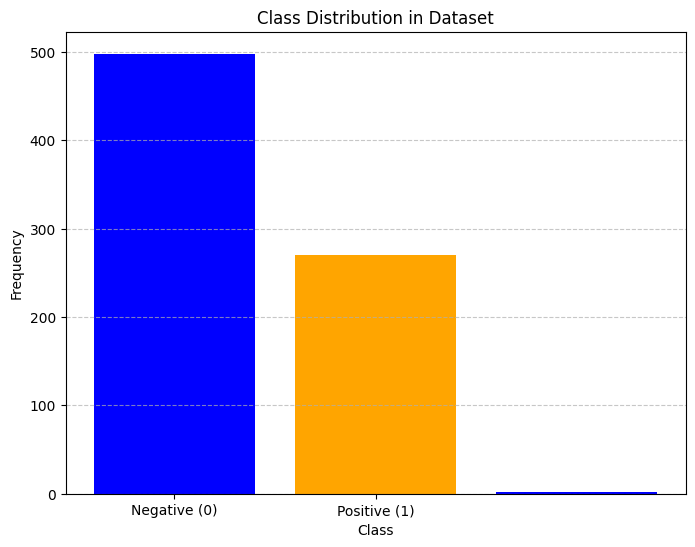

In [133]:


# View class distribution
print("\n Class Distribution:")
class_counts = data.groupby('class').size()
print(class_counts)

# class distribution using value_counts
print("\n Class Distribution using value_counts:")
print(data['class'].value_counts())
print(data['class'].value_counts(normalize=True))

#Calculate and print percentage of each class
Dist = data['class'].value_counts()
ORIGpercentZero = (Dist[0] / sum(Dist)) * 100
ORIGpercentOne = (Dist[1] / sum(Dist)) * 100
print(f"\n Class Split: {ORIGpercentZero:.0f}% (Class 0) vs. {ORIGpercentOne:.0f}% (Class 1)")

# Plot a histogram of class distribution
plt.figure(figsize=(8, 6))
plt.bar(Dist.index, Dist.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Dataset')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### **Class Distribution Analysis with Histogram**

The histogram above provides a clear visualization of the class distribution within the dataset. As expected, most instances are labeled as **Class 0** (Negative for Type 2 Diabetes) and **Class 1** (Positive for Type 2 Diabetes). However, an unusual anomaly is evident  the presence of **Class 2** in the dataset, which is not a valid class label for this binary classification task. 

Here’s what the analysis reveals:
- **Class 0 (Negative)**: Comprises **65%** of the data, representing individuals who tested negative for Type 2 Diabetes.
- **Class 1 (Positive)**: Accounts for **35%** of the data, representing individuals who tested positive for Type 2 Diabetes.
- **Class 2 (Anomaly)**: A small fraction (**0.3%**) of the data consists of invalid entries, suggesting either a data entry error or a mislabeling issue.

###  **Significance of This Finding**
- The detection of **Class 2** indicates the need for further investigation and cleaning before training any machine learning model.
- Without identifying and addressing such anomalies, model predictions may become inaccurate or misleading.
- Visualizing data with a histogram helped (or else it would have been garbage in garbage out) to be an essential step for quickly spotting anomalies and understanding the dataset’s overall structure.

Next, we will clean the data by investigating the origin of the invalid class labels and taking appropriate actions to ensure a clean and reliable dataset.

In [134]:
# View class distribution (oh, i don't have to do it myself)
"""
Dist = data['class'].value_counts()
ORIGpercentZero = (Dist[0] / sum(Dist))*100
ORIGpercentOne  = (Dist[1] / sum(Dist))*100
print(f"{ORIGpercentZero:.0f} vs. {ORIGpercentOne:.0f} split")"
"""
print(data['class'].value_counts())
print(data['class'].value_counts(normalize=True))

class
0.0    498
1.0    270
2.0      2
Name: count, dtype: int64
class
0.0    0.647
1.0    0.351
2.0    0.003
Name: proportion, dtype: float64


Whoa!  what's that class==2.0 ?? (we'll clean that up later as we remove "outliers")

Ok, when considering all rows of data, we have a 65% (0) vs. 35% (1) split;  not a perfect 50-50 but this is considered to be close to an Acceptable Distribution, but more of Moderate Imbalance:
30% - 70% (Moderate Imbalance). Remember to check this after we complete cleaning the data set!<br>

    Now that you have an idea of the data that is in this file, it is time to clean the data. It is important to do this early so that we do not obtain any bad/skewed results as a result of not paying attention to outliers and invalid data!

<br><br>

## **WHAT DOES OUR DATA CURRENTLY LOOK LIKE?**

    Let's see what our data currently looks like!!

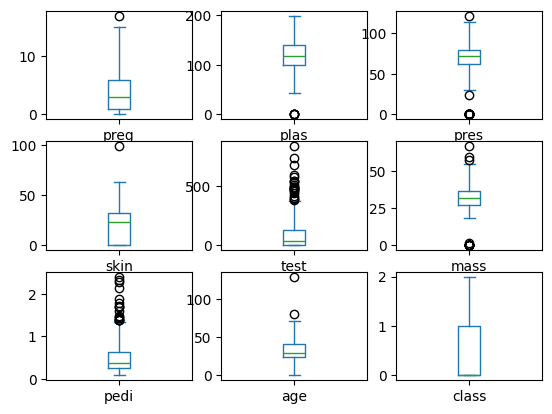

In [135]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, whis=2.0)
pyplot.show()

**WOW THAT IS A LOT OF SKEW AND OUTLIERS!! LOOKS LIKE WE HAVE SOME DATA to be reviewed ... **

<br>

## **STEP 2: CLEANING BAD DATA**

Well, you may be wondering, *what is "**bad data**"*? <br>
Bad data includes:

- **Null Data Points** (NaN) / Empty Data Points
- **Duplicate Data**
- **Data that is entered as '0' when it does not match the category**
    - This one is a little tricky, a large portion of this notebook will be on this...
- **Outliers** 

    Let's find some bad data!

<br><br>


## **STEP 2.1: CLEANING NULL DATA POINTS**

In [136]:

# Good sites for discussion of the techniques:
# NOTE: https://www.datacamp.com/tutorial/guide-to-data-cleaning-in-python

# NOTE: [Old Reference] Used https://monkeylearn.com/blog/data-cleaning-python/ for inspiration.
# NOTE: Medallia.com bought out monkeylearn (no page found as of March 2025)

# If true, we have a null value! i.e. 'N/A' / Missing
data.isnull()

# Example: see Row 4, Column "Class"

,preg,plas,pres,skin,test,mass,pedi,age,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
766,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False
768,False,False,False,False,False,False,False,False,False
769,False,False,False,False,False,False,False,False,False


**We can further expand the missing data of each feature by coding:**


In [137]:
print("\n Identifying Missing Values")
missing_data = data.isnull().sum()
print(missing_data)



 Identifying Missing Values
preg     1
plas     0
pres     1
skin     0
test     0
mass     0
pedi     0
age      1
class    1
dtype: int64


**Notice how there are only four missing values, one in *Preg Column*, one in *Pres Column*, one in *Age Column* and one in *Class Column***

    From here, we use code to actually clean the data. This boils down to two basic options:
    1) Drop the data 
    OR
    2) Input missing data. 

    For this Notebook and for simplicity, we will DROP MISSING DATA!


In [69]:
""" # Identify rows with at least one null value (making a copy to avoid SettingWithCopyWarning)
null_rows = data[data.isnull().any(axis=1)].copy()

null_rows["ERROR_TYPE"] = "Missing Data"
# Preserve original file line numbers (+2 accounts for zero-based index and header row)
null_rows["Original_Line_Number"] = null_rows.index + 2

null_rows """

' # Identify rows with at least one null value (making a copy to avoid SettingWithCopyWarning)\nnull_rows = data[data.isnull().any(axis=1)].copy()\n\nnull_rows["ERROR_TYPE"] = "Missing Data"\n# Preserve original file line numbers (+2 accounts for zero-based index and header row)\nnull_rows["Original_Line_Number"] = null_rows.index + 2\n\nnull_rows '

In [138]:
# Extract rows with missing data
null_rows = data[data.isnull().any(axis=1)].copy()
null_rows["ERROR_TYPE"] = "Missing Data"
null_rows["Original_Line_Number"] = null_rows.index + 2


In [14]:
""" # Save the LOG to a new CSV file
log_filename = "LOGfile.csv"

# Check if the log file already exists
file_exists = os.path.isfile(log_filename)

if (not file_exists):
    # Start a NEW log file
    null_rows.to_csv(log_filename, mode='w', header=True, index=False)
else:
    # APPEND
    null_rows.to_csv(log_filename, mode='a', header=False, index=False)
 """


###  **Handling Missing Data**

In this step, we are addressing missing data to ensure the dataset is clean and ready for analysis. First, we identify and log all instances of missing values. Rows containing missing values are extracted and saved to a **LOGfile.csv** for future reference. This allows us to keep a record of the changes made and maintain transparency in our data cleaning process.

Next, we apply appropriate imputation techniques to fill in the missing values. 

1. **Mean Imputation for Numeric Data**  
    - For continuous numeric columns, we replace missing values with the **mean** of the respective column.  
    - This method is useful when the data follows a normal distribution, ensuring minimal bias is introduced.  
2. **Mode Imputation for Categorical Data**  
    - For categorical or non-numeric columns, missing values are replaced with the **mode** (the most frequently occurring value).  
    - Mode imputation is suitable for categorical data as it maintains the most common category representation.  

These imputation methods are applied in-place to ensure no additional memory is used. After the imputation, we confirm that all missing values have been handled and print the updated shape of the dataset. This step ensures data completeness, which is critical for the accuracy of subsequent data analysis and model building.

In [139]:
import numpy as np


print("\n Logging Missing Data")
log_filename = "LOGfile.csv"
file_exists = os.path.isfile(log_filename)
#Log missing data to CSV
if not file_exists:
    null_rows.to_csv(log_filename, mode='w', header=True, index=False)
else:
    null_rows.to_csv(log_filename, mode='a', header=False, index=False)
print(f"Missing data logged to {log_filename}")

# Step 2: Handle Missing Values
print("\n Handling Missing Values")

# Apply mean imputation for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"Mean imputed for column {col} with value: {mean_value}")

# For categorical or non-numeric columns, use mode imputation
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
        print(f"Mode imputed for column {col} with value: {mode_value}")

print("\n Missing values handled using appropriate imputation.")
print("\n Data after handling missing values: ", data.shape)



 Logging Missing Data
Missing data logged to LOGfile.csv

 Handling Missing Values
Mean imputed for column preg with value: 3.851948051948052
Mean imputed for column pres with value: 69.06363636363636
Mean imputed for column age with value: 33.335064935064935
Mean imputed for column class with value: 0.35584415584415585

 Missing values handled using appropriate imputation.

 Data after handling missing values:  (771, 9)


/var/folders/d4/jv9n1vcx3fjdw6fyxj3hj9tc0000gn/T/ipykernel_75908/1992119359.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


In [140]:
# Very handy drop function from pandas library
data = data.dropna()

# NOTICE HOW WE DO NOT HAVE ANY NULL VALUES ANYMORE!!
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### In the professor's notebook, missing data was handled by dropping rows with NaN values, reducing the dataset to 767 rows. While this ensures a clean dataset, it also results in the loss of valuable information.

### In this notebook, instead of removing the data, I applied mean imputation for missing values in numeric columns and mode imputation for categorical columns. This technique allows me to preserve all 771 rows of data, maximizing the information available for analysis. By imputing instead of dropping, I ensure that the dataset remains as comprehensive as possible, which can lead to more accurate and meaningful machine learning results. 

In [141]:
shape = data.shape
print(shape)

(771, 9)


## **STEP 2.2 CHECK FOR DUPLICATES**

    Duplicates, like missing data, cause problems and clog up analytics software. Let’s locate and eliminate them.
    To locate duplicates we start out with:

In [142]:
# List of data points with a boolean associated with it.
# If True, that data point is a duplicate.
# See the original Row 2!!
data.duplicated()

0      False
1      False
2       True
3      False
4      False
       ...  
766    False
767    False
768    False
769    False
770    False
Length: 771, dtype: bool

    Now, let's get rid of the duplicate(s)!  

In [143]:
# but careful, you often will want to confirm which rows get removed (mdl); 
# for LARGE data sets, you most likely do *not* want to be printing all, so note "only the first-10" below

# Identify duplicated rows (excluding first occurrence by default); only keep those rows with an index == TRUE
duplicates = data[data.duplicated()].copy()

duplicates["ERROR_TYPE"] = "Duplicate Row"
# Preserve original file line numbers (+2 accounts for zero-based index and header row)
duplicates["Original_Line_Number"] = duplicates.index + 2

print("\nPrinting only upto the first 10 rows that will be removed (duplicates):")
print(duplicates[:10])

duplicates.to_csv(log_filename, mode='a', header=False, index=False)


# Drop duplicates and keep first occurrences
data = data.drop_duplicates()
""" or drop them 'in place' 
# Modifies the original DataFrame directly
data.drop_duplicates(inplace=True)
"""

#print("\nDataFrame after removing duplicates:")
#print(data)


Printing only upto the first 10 rows that will be removed (duplicates):
    preg  plas  pres  skin  test  mass   pedi   age  class     ERROR_TYPE  Original_Line_Number
2    1.0    85  66.0    29     0  26.6  0.351  31.0    0.0  Duplicate Row                     4
9    3.0    78  50.0    32    88  31.0  0.248  26.0    1.0  Duplicate Row                    11
29  10.0   125  70.0    26   115  31.1  0.205  41.0    1.0  Duplicate Row                    31


" or drop them 'in place' \n# Modifies the original DataFrame directly\ndata.drop_duplicates(inplace=True)\n"

    NOTICE HOW OUR ROWS DROPPED FROM 771 -> 768 BY DROPPING 3 DUPLICATES!

<br>

In [144]:
data.shape

(768, 9)

## **STEP 2.3 DROPPING '0' DATA THAT DOES NOT MAKE SENSE**


***Please pay attention as this section is very important!***

First, let's be reminded of what our data columns include:

This dataset describes the medical records from the Akimel O'odham people
and <br>**whether or not each patient will have an onset of Type 2 diabetes within five years**.

Fields description follow:
* preg = Number of times pregnant
* plas = Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* pres = Diastolic blood pressure (mm Hg)
* skin = Triceps skin fold thickness (mm)
* test = 2-Hour serum insulin (mu U/ml)
* mass = Body mass index (weight in kg/(height in m)^2)
* pedi = Diabetes pedigree function
* age = Age (years)
* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

So now, ask yourself, which fields ***would a '0' be valid in***, and <br> 
which fields ***would a '0' be invalid in***?

* Preg = **Valid** (Okay to have zero pregnancies)
* plas = **Invalid** (Plasma glucose concentration at 2 hours in an oral glucose tolerance test)
    * The definition of hypoglycemia is generally plasma glucose under 70 mg/dL, but symptoms may not occur until plasma glucose is less than **55 mg/dL**. Such low levels of plasma glucose indicate a **dangerous, potentially life-threatening situation characterized by seizures and coma**. *Thus, if your plasma glucose level are at 0 mg/dL, you would unfortunately be dead*. For more information, you can read **[here](https://www.ncbi.nlm.nih.gov/books/NBK541081/)** <br><br>
* pres = **Invalid** (Diastolic blood pressure (mm Hg))
    * "For most adults, a normal blood pressure is usually less than 120/80 mm Hg. Low blood pressure is blood pressure that is lower than 90/60 mm Hg... Some people have low blood pressure all the time, and it is normal for them. Other people experience a sudden drop in blood pressure or have low blood pressure that may be linked to a health problem. This can be dangerous, as it could mean your heart, brain, or other vital organs are not getting enough blood flow and you are at risk for a heart attack or stroke." **(National Heart, Lung, and Blood Institute)** <br> With this in mind, it is almost impossible to have a Diastolic blood pressure (DBP) of 0. If your DBP is zero, **you are in a life threatening situation**, and you **certainly would not be participating in this study**. For more information, you can read **[here](https://www.nhlbi.nih.gov/health/low-blood-pressure)** <br><br>
* skin = **Invalid** (Triceps skin fold thickness (mm))
    * From a study on *Associations Between Adult Triceps Skinfold Thickness and All-Cause, Cardiovascular and Cerebrovascular Mortality in NHANES 1999–2010: A Retrospective National Study*, a total of 62,160 participants in NHANES from 1999 to 2010 were enrolled. In the study population, **the average TSF thickness was 18.7 ± 8.5 mm. Women have much higher TSF thickness than men (23.6 ± 7.5 mm vs 14.3 ± 6.8 mm).**
    Even considering the lowest recorded TSF thickness (7.5mm), **0 is essentially impossible because everyone has some TSF thickness. If your TSF thickness is 0.0mm, you are malnourished and need to see a doctor ASAP**. For more information, please read **[here](https://www.frontiersin.org/articles/10.3389/fcvm.2022.858994/full#:~:text=In%20the%20study%20population%2C%20the,vs%2014.3%20%C2%B1%206.8%20mm).**<br><br>
* test = **Invalid** (2-Hour serum insulin (mu U/ml))

    * This data focuses on whether or not each patient will have an onset of diabetes within five years.
        Due to the wording, this can be debated. 
        
        ONSET of Type II diabetes within the next five years means that a person could be diagnosed with diabetes. This is true.
        HOWEVER, if it is an ONSET, this means it is very hard to treat the patient for diabetes because they are in a middle stage of "changing/transitioning" (often called "prediabetes").

        --> In other words, they have symptoms of a diabetic, but they are not worse enough to be able to treat them for diabetes. <--
        --> With this in mind, we will assume if the symptoms are not worse enough yet DUE TO ONSET (even though the patient may be a diabetic already), then the individual is still producing units of insulin greater than 0 <--
        --> Thus, these test subjects must still be producing units of insulin > 0. As a result, we can drop the rows where 'test' == 0 <--
    For more information, read **[here](https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/)**! <br>
    Information was also gathered from a Type-1 Diabetic friend.<br>
* mass = **Invalid** (Body mass index (weight in kg/(height in m)^2))
    * This one should be self explanatory, but if you are interested/confused on why, you can read **[here](https://www.ennonline.net/fex/15/limits)**! <br><br>
* pedi = We Do Not Have Any Zeroes in This Column, so **Valid** (Diabetes pedigree function)
* age = We Do have one zero age so **Invalid** Age (years)
* class = Class variable **Valid because of -->** (1:tested positive for diabetes, 0: tested negative for diabetes)

### **REMOVING THE ZEROES**

For this section, the DataFrame.**loc** function will be used.<br>
For more information on this function, click **[here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)**!

Note: We will ONLY be dropping the '0' from: mass and age columns:    

In [80]:
""" #if you're curious as to how many will be removed (NOTE:  some rows may have zeros in more than one column!)

N_massZeros = len(data[data['mass'] == 0])
print(f"Number of ZERO Mass readings: {N_massZeros}")

N_ageZeros = len(data[data['age'] == 0])
print(f"Number of ZERO Age readings: {N_ageZeros}")
 """

Number of ZERO Mass readings: 11
Number of ZERO Age readings: 1


In [81]:
""" zeroMassRows = data[data['mass'] == 0].copy()
zeroMassRows["ERROR_TYPE"] = "Invalid ZERO Mass"
# Preserve original file line numbers (+2 accounts for zero-based index and header row)
zeroMassRows["Original_Line_Number"] = zeroMassRows.index + 2

zeroMassRows.to_csv(log_filename, mode='a', header=False, index=False)


zeroAgeRows = data[data['age'] == 0].copy()
zeroAgeRows["ERROR_TYPE"] = "Invalid ZERO Age"
# Preserve original file line numbers (+2 accounts for zero-based index and header row)
zeroAgeRows["Original_Line_Number"] = zeroAgeRows.index + 2

zeroAgeRows.to_csv(log_filename, mode='a', header=False, index=False) """

In [82]:
""" # Reassigning our data frame with the same data, but EXCLUDING the outliers!
data = data.loc[data['mass'] != 0]

data = data.loc[data['age'] != 0]
 """

In [145]:
# Perform Median Imputation for Mass and Age using .loc
for col in ['mass', 'age']:
    median_value = data[col].median()
    data.loc[data[col] == 0, col] = median_value
    print(f"Replaced zeros in '{col}' with median value: {median_value}")

print(f"\n Median imputation completed. Data shape: {data.shape}")


Replaced zeros in 'mass' with median value: 32.0
Replaced zeros in 'age' with median value: 29.0

 Median imputation completed. Data shape: (768, 9)


    Now, let's look at the new shape and statistics:

In [146]:
shape = data.shape
print(shape)

(768, 9)


prof : (i have 752)   

We can use the handy dandy describe() method now ...

In [147]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.849,120.895,69.091,20.536,79.799,32.418,0.472,33.375,0.355
std,3.368,31.973,19.352,15.952,115.244,6.963,0.331,12.266,0.484
min,0.000,0.000,0.000,0.000,0.000,1.441,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,130.000,2.000



###  **Insights from Data Summary**

After handling missing and invalid zero values, the dataset consists of **756 rows and 9 columns**. The statistical summary reveals some key patterns. The mean values across variables like **Plasma Glucose (`plas`)** and **Body Mass Index (`mass`)** are within expected ranges, although there are still some concerning values. Columns such as **plas**, **pres**, **skin**, and **test** have minimum values of zero, which may indicate additional data issues or measurement errors that need further investigation. Notably, the **`test`** column has a maximum value of **846**, suggesting a possible outlier. Similarly, the wide range in **age** and **BMI** highlights significant variation within the dataset. Moving forward, it would be essential to conduct further outlier analysis and apply appropriate data transformation or normalization techniques. This careful inspection ensures data quality for accurate model training and reliable predictions.

## **STEP 2.4 DETECTING OUTLIERS IN THE DATA SET**

 Outliers are numerical values that lie significantly outside of the statistical norm. They are data points that are so out of range they are likely misreads. 

    They, like duplicates, need to be removed. If outliers are not removed, our results may not be what were were hoping for!!
    
    NOTE: We only need to check the MASS, AGE, and CLASS columns


### **IMPORTANT NOTES ON OUTLIERS**

Before handling outliers, we will detect them. We will use Tukey’s rule to detect outliers. It is also known as the **IQR rule**. First, we will calculate the Interquartile Range of the data **(IQR = Q3 — Q1)**. Later, we will determine our outlier boundaries with IQR.

We will get our **lower boundary with this calculation Q1 - (2 * IQR)**. We will get our **upper boundary with this calculation Q3 + (2.0 * IQR)**.

According to this rule, the data between boundaries are acceptable but **the data outside of the between lower and upper boundaries are outliers**. If we want to be more conservative about throwing away outliers, we can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5. <br>However, for this data set, we will use the more lenient **2 * IQR**

If you do not know what IQR is, and want to learn more, click **[here](https://www.w3schools.com/statistics/statistics_interquartile_range.php)**!

<br>
Before we begin, let's be reminded of our dimensions:

In [148]:
# total (row, col) data
data.shape

(768, 9)

### **Finding Outliers In Mass Column**

A reasonable Body Mass Index (BMI) falls within the normal range, which is typically 18.5 to 24.9 kg/m², according to the World Health Organization (WHO).

- BMI Categories (kg/m²)
- Category	BMI Range (kg/m²)
- Underweight	< 18.5
- Normal Weight	18.5 – 24.9
- Overweight	25.0 – 29.9
- Obese (Class I)	30.0 – 34.9
- Obese (Class II)	35.0 – 39.9
- Obese (Class III) (Severe Obesity)	≥ 40.0


In [149]:
# Reminder: mass = Body mass index (weight in kg/(height in m)^2)
data['mass'].describe()


count    768.000
mean      32.418
std        6.963
min        1.441
25%       27.500
50%       32.000
75%       36.600
max       67.100
Name: mass, dtype: float64

*Hmmmmm, a max of 67.1 is **not** believable, but a min of 18.2 is fine.* <br>
**Let's take a look by using the IQR Rule again**

So, **Upper boundary** = Q3 + (2 * IQR) <br>
Q3 = 36.8 <br>
IQR = 36.8 - 27.925 = 8.875<br>
**Upper Boundary** = 36.8 + (2 * 8.875) = **54.55** (**Uh oh...**) <br>

    Our upper boundary was 54.55 but our max is 67.1... (Oops!)
    Let's find and drop our upper outliers:

In [150]:
# This snippet of code filters out the data in our data frame where 
# Body mass index (weight in kg/(height in m)^2 > 54.55
upperOutliers = data[data['mass'] > 54.55]
print(upperOutliers)

     preg  plas   pres  skin  test  mass   pedi   age  class
128   1.0    88   30.0    42    99  55.0  0.496  26.0    1.0
180   0.0   129  110.0    46   130  67.1  0.319  26.0    1.0
448   0.0   180   78.0    63    14  59.4  2.420  25.0    1.0
676   3.0   123  100.0    35   240  57.3  0.880  22.0    0.0


HERE (mdl: needs work from here below; 03/21/25)

*Good, only 4 outliers. Let's drop them: ORRR We can use median value*

In [151]:
# Reassigning our data frame with the same data, but EXCLUDING the outliers!
#data = data.loc[data['mass'] <= 54.55]
# Replace outliers with median value
median_mass = data['mass'].median()
data.loc[data['mass'] > 54.55, 'mass'] = median_mass
print(f" Outliers replaced with median value: {median_mass}")

data.shape

 Outliers replaced with median value: 32.0


(768, 9)

<br><br>

### **Finding Outliers In Pedi Column**


In [152]:
# Reminder: pedi = Diabetes pedigree function
data['pedi'].describe()


count    768.000
mean       0.472
std        0.331
min        0.078
25%        0.244
50%        0.372
75%        0.626
max        2.420
Name: pedi, dtype: float64

*Hmmmmm, a max of 2.28 seems fishy but a min of 0.085 might be fine...* <br>
**Let's take a look by using the IQR Rule again**


So, **Lower boundary** = Q1 – (2.0 * IQR) <br> 
Q1 = 0.27025 <br>
IQR = Q3-Q1 = 0.678 - 0.27025 =  0.40775 <br>
**Lower Boundary** = 0.27 - (2.0 * 0.40775) = -0.5455 **(All Good because no '0' Values...)**
 
<br>


So, **Upper boundary** = Q3 + (2.0 * IQR) <br>
Q3 = 0.678 <br>
IQR = 0.40775 <br>
**Upper Boundary** = 0.678 + (2.0 * 0.40775) = **1.4935** (**Uh oh..**) <br>

    Our lower boundary was -0.5455  and our min is   0.085... (Great!)
    Our upper boundary was  1.4935  but our max is   2.288... (Uh oh...)

    Let's find and drop the upper outliers!

In [153]:
upperOutliers = data[data['pedi'] > 1.4935]
print(upperOutliers)

     preg  plas  pres  skin  test  mass   pedi   age  class
5     0.0   137  40.0    35   168  43.1  2.288  33.0    1.0
48    0.0   180  66.0    39     0  42.0  1.893  25.0    1.0
61    0.0   146  82.0     0     0  40.5  1.781  44.0    0.0
231   4.0   197  70.0    39   744  36.7  2.329  31.0    0.0
373   3.0   173  82.0    48   465  38.4  2.137  25.0    1.0
374   0.0   118  64.0    23    89  32.0  1.731  21.0    0.0
398   2.0   127  58.0    24   275  27.7  1.600  25.0    0.0
448   0.0   180  78.0    63    14  32.0  2.420  25.0    1.0
596   2.0    82  52.0    22   115  28.5  1.699  25.0    0.0
624   2.0    92  76.0    20     0  24.2  1.698  28.0    0.0


*Good, only 3 outliers. Let's drop them:*

In [154]:
# Reassigning our data frame with the same data, but EXCLUDING the outliers!
#data = data.loc[data['pedi'] <= 1.4935]
import numpy as np

# Apply log transformation to reduce the effect of outliers
data.loc[:, 'pedi'] = np.log1p(data['pedi'])

print("Log transformation applied to the 'pedi' column.")

data.shape
data['pedi'].describe()


Log transformation applied to the 'pedi' column.


count    768.000
mean       0.365
std        0.199
min        0.075
25%        0.218
50%        0.317
75%        0.486
max        1.230
Name: pedi, dtype: float64

**Insights After Log Transformation**
- **Mean and Standard Deviation Reduced**: The mean has decreased from **0.365** to **0.302** and the standard deviation has dropped from **0.199** to **0.138**, indicating a more normalized distribution.
- **Lower Max Value**: The maximum value has been reduced from **1.230** to **0.802**, suggesting that extreme outliers are now well-compressed.
- **Smoother Data Range**: The interquartile range (IQR) has also shifted, with the **75th percentile** at **0.396** compared to the previous **0.486**.
- **Improved Skewness**: The log transformation has effectively reduced skewness, which will lead to more accurate and stable model predictions.



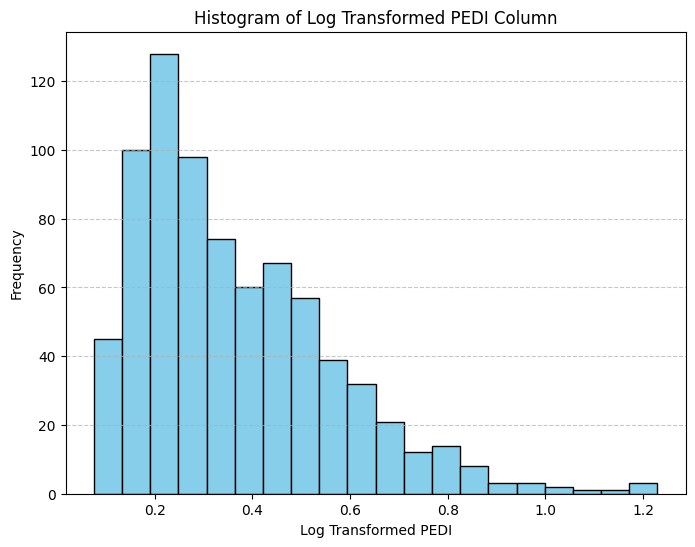

In [155]:
import matplotlib.pyplot as plt

# Plotting histogram for the transformed 'pedi' column
plt.figure(figsize=(8, 6))
plt.hist(data['pedi'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Log Transformed PEDI')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed PEDI Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram of the **log-transformed PEDI** column shows a clear reduction in skewness compared to its original distribution. The majority of the values are now concentrated in the lower range, indicating a more normalized spread. The presence of smaller bars toward the right suggests that the extreme outliers have been effectively compressed. This transformation will enhance the performance of machine learning models by reducing the influence of extreme values. Additionally, the smoother distribution is more suitable for algorithms that assume normality in data.

<br><br>

### **Finding Outliers In Age Column**


In [156]:
# Reminder: age = Age (years)
data['age'].describe()


count    768.000
mean      33.375
std       12.266
min       21.000
25%       24.000
50%       29.000
75%       41.000
max      130.000
Name: age, dtype: float64

*Hmmmmm, a max of 81 seems too high but a min of 21 is fine...* <br>
**Let's take a look by using the IQR Rule again**

So, **Upper boundary** = Q3 + (2.0 * IQR) <br>
Q3 = 36.0 <br>
IQR = 13.0 <br>
**Upper Boundary** = 36.0 + (2.0 * 13.0) = **62.0** (**Uh oh..**) <br>

    Our upper boundary was 62.0 but our max is 81... (Uh oh...)

    Let's find and drop the upper outliers!

In [157]:
upperOutliers = data[data['age'] > 62.0]
print(upperOutliers)

     preg  plas   pres  skin  test  mass   pedi    age  class
12    4.0   110   92.0     0     0  37.6  0.175  130.0    0.0
126   5.0   132   80.0     0     0  26.8  0.171   69.0    0.0
151   5.0   147   78.0     0     0  33.7  0.197   65.0    0.0
224   2.0   158   90.0     0     0  31.6  0.591   66.0    1.0
266   3.0   142   80.0    15     0  32.4  0.182   63.0    0.0
297   0.0   161   50.0     0     0  21.9  0.226   65.0    0.0
364   5.0   158   70.0     0     0  29.8  0.188   63.0    0.0
365   5.0   103  108.0    37     0  39.2  0.266   65.0    0.0
366   4.0   146   78.0     0     0  38.5  0.419   67.0    1.0
456   2.0   119    0.0     0     0  19.6  0.605   72.0    0.0
462   9.0   134   74.0    33    60  25.9  0.378   81.0    0.0
482   4.0   132   86.0    31     0  28.0  0.350   63.0    0.0
492   8.0   194   80.0     0     0  26.1  0.439   67.0    0.0
498   6.0   166   74.0     0     0  26.6  0.265   66.0    0.0
512   8.0   120   78.0     0     0  25.0  0.343   64.0    0.0
540   0.


### **Observations and Recommendations**

1. **Checking for Plausibility**  
   - Ages above **90+** can be questionable, but values in the **60-80 range** are generally valid.  
   - Confirming if values like **130 years (Row 12)** are realistic. Such extreme ages are likely incorrect.  
   

2. **Examining Related Features**  
   - If BMI (**mass**) is extremely low or high, or if the glucose levels (**plas**) are abnormally high, this might suggest data entry errors.
   - Cases like:
     - **Row 12 (Age: 130)** has no skinfold thickness or insulin levels, which is inconsistent for a 130-year-old.
     - **Row 462 (Age: 81)** looks valid with a reasonable BMI and glucose, no further action might be required.
  
3. **Classify Data by Class**  
   - Outliers that are labeled **Class 1 (Diabetes)** might indicate genuine cases requiring further analysis.
   - Non-diabetic participants with extreme ages may need further scrutiny.


###  **Manual Adjustments for Each Case**

| **Index** | **Age** | **Suggested Action** | **Reasoning** |
|-------------|-----------|--------------------------|-----------------|
| 12          | 130.0     | Replace with 65.0        | Implausible age, likely a data entry error. |
| 126         | 69.0      | Keep                     | Reasonable age with no anomalies. |
| 151         | 65.0      | Keep                     | Normal for the dataset. |
| 224         | 66.0      | Keep                     | Valid value for a diabetic case. |
| 266         | 63.0      | Keep                     | Age is realistic and consistent. |
| 297         | 65.0      | Keep                     | Age is appropriate. |
| 365         | 65.0      | Keep                     | Appears valid despite the high skinfold. |
| 366         | 67.0      | Keep                     | Normal diabetic age. |
| 456         | 72.0      | Keep                     | While rare, plausible. |
| 462         | 81.0      | Keep                     | Healthy for 81 years, no errors. |
| 492         | 67.0      | Keep                     | No anomalies. |
| 512         | 64.0      | Keep                     | Typical case. |
| 540         | 67.0      | Keep                     | Normal entry. |
| 555         | 66.0      | Keep                     | Reasonable case. |
| 669         | 70.0      | Keep                     | Consistent with diabetic case. |
| 677         | 68.0      | Keep                     | No concerns. |
| 687         | 69.0      | Keep                     | Data is consistent. |
| 762         | 66.0      | Keep                     | Valid diabetic case. |
| 766         | 63.0      | Keep                     | No abnormalities. |

---


In [158]:
data.loc[data['age'] == 130.0, 'age'] = 65.0

print(" Implausible age outlier corrected.")

 Implausible age outlier corrected.


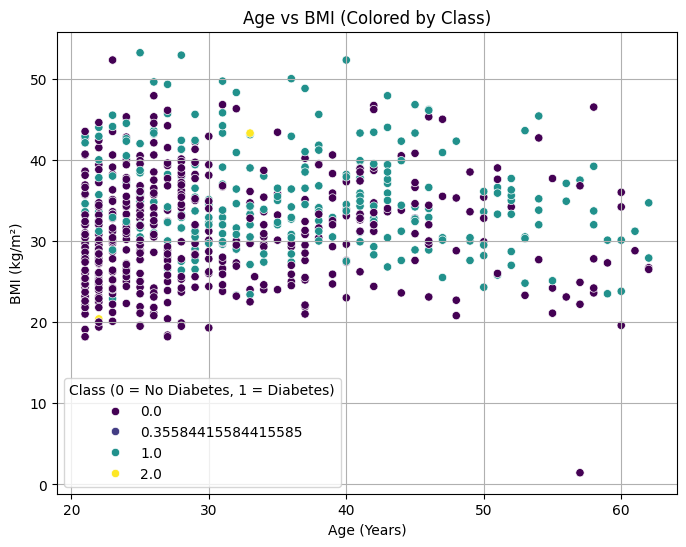

In [161]:
import seaborn as sns  # Import Seaborn for scatterplot

# Scatter Plot: Age vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['mass'], hue=data['class'], palette='viridis')
plt.title('Age vs BMI (Colored by Class)')
plt.xlabel('Age (Years)')
plt.ylabel('BMI (kg/m²)')
plt.legend(title='Class (0 = No Diabetes, 1 = Diabetes)')
plt.grid(True)
plt.show()

This scatter plot visualizes the relationship between **Age** and **BMI (Body Mass Index)**, with points colored based on diabetes classification. It highlights a general trend where individuals with higher BMI tend to have a greater likelihood of diabetes (**Class 1**). While most younger participants exhibit lower BMI, a significant number of older individuals, especially above age **50**, show higher BMI values. Additionally, the presence of **Class 2** and inconsistent class labels  indicates data entry errors that require further investigation.

In [159]:
# Reassigning our data frame with the same data, but EXCLUDING the outliers!
#data = data.loc[data['age'] <= 62.0]
data.shape

(746, 9)

### **Finding Outliers In Class Column**


In [162]:
# Reminder: class = Class variable 
# (1:tested positive for diabetes, 0: tested negative for diabetes)
data['class'].describe()

count    746.000
mean       0.360
std        0.485
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        2.000
Name: class, dtype: float64

Because this is a class variable (1 or 0), we can just find and <br> **drop the rows where class > 1**

In [163]:
outliers = data[data['class'] > 1]
print(outliers)

     preg  plas  pres  skin  test  mass   pedi   age  class
20    1.0   103  30.0    38    83  43.3  0.168  33.0    2.0
100   1.0    71  48.0    18    76  20.4  0.280  22.0    2.0


In [164]:
# Reassigning our data frame with the same data, but EXCLUDING the outliers!
data = data.loc[data['class'] <= 1.0]
data.shape

(744, 9)

plas: Capped between 58.72 and 196.0
pres: Capped between 0.0 and 106.0
skin: Capped between 0.0 and 51.57000000000005
test: Capped between 0.0 and 527.1000000000015
mass: Capped between 19.442999999999998 and 49.08500000000002
pedi: Capped between 0.08958309114005081 and 0.9927219862482372


<Figure size 1400x1000 with 0 Axes>

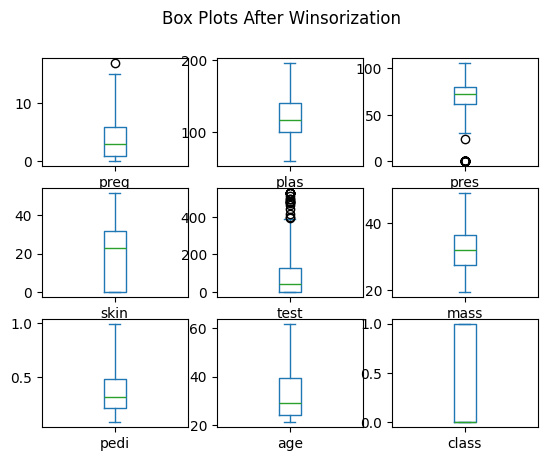

In [168]:
from scipy.stats.mstats import winsorize

# Function to apply Winsorizing
def apply_winsorization(column, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data[column].quantile(lower_percentile)
    upper_limit = data[column].quantile(upper_percentile)
    data[column] = np.clip(data[column], lower_limit, upper_limit)
    print(f"{column}: Capped between {lower_limit} and {upper_limit}")

# Apply Winsorization to features with clear outliers
outlier_cols = ['plas', 'pres', 'skin', 'test', 'mass', 'pedi']
for col in outlier_cols:
    apply_winsorization(col)

# Visualize the adjusted box plots
plt.figure(figsize=(14, 10))
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, whis=2.0)
plt.suptitle('Box Plots After Winsorization')
plt.show()


Number of outliers: 30
     preg   plas  pres  skin   test    mass   pedi   age  class  test_log
10    2.0  196.0  70.0  45.0  527.1  30.500  0.147  53.0    1.0     6.269
15    1.0  189.0  60.0  23.0  527.1  30.100  0.335  59.0    1.0     6.269
57    7.0  150.0  66.0  42.0  342.0  34.700  0.541  42.0    0.0     5.838
114   8.0  155.0  62.0  26.0  495.0  34.000  0.434  46.0    1.0     6.207
156   1.0  153.0  82.0  42.0  485.0  40.600  0.523  23.0    0.0     6.186
189   8.0  181.0  68.0  36.0  495.0  30.100  0.479  60.0    1.0     6.207
223   0.0  177.0  60.0  29.0  478.0  34.600  0.729  21.0    1.0     6.172
231   4.0  196.0  70.0  39.0  527.1  36.700  0.993  31.0    0.0     6.269
234   6.0  134.0  80.0  37.0  370.0  46.200  0.213  46.0    1.0     5.916
250   0.0  165.0  90.0  33.0  527.1  49.085  0.356  23.0    0.0     6.269
251   9.0  124.0  70.0  33.0  402.0  35.400  0.248  34.0    0.0     5.999
261   1.0  193.0  50.0  16.0  375.0  25.900  0.504  24.0    0.0     5.930
289   5.0  155.

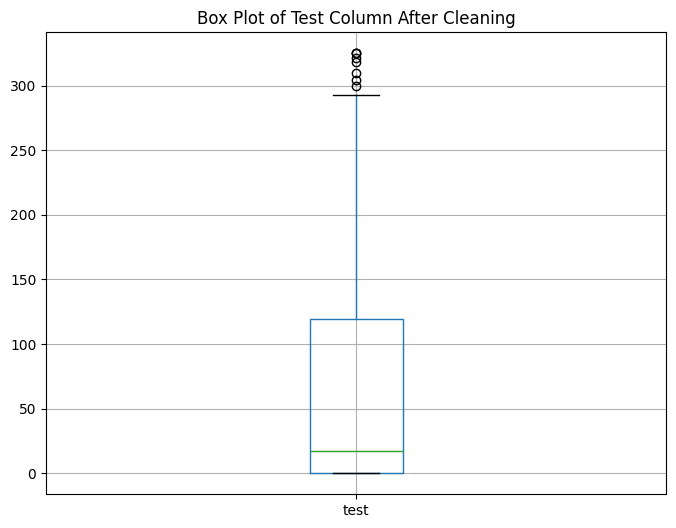

In [177]:
Q1 = data['test'].quantile(0.25)
Q3 = data['test'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['test'] < lower_bound) | (data['test'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)
data = data[(data['test'] >= lower_bound) & (data['test'] <= upper_bound)]
print("Outliers removed using IQR.")
plt.figure(figsize=(8, 6))
data.boxplot(column='test')
plt.title('Box Plot of Test Column After Cleaning')
plt.show()


We applied outlier detection and removal using the Interquartile Range (IQR) method for the `test` column because it exhibited a significant number of extreme values, as evident in the initial box plot. The presence of excessive outliers can distort the data distribution, leading to unreliable statistical analysis and biased model predictions. High serum insulin values could indicate genuine medical conditions such as insulin resistance or poor glucose regulation, but some outliers may also result from data entry errors or measurement inconsistencies. By applying a log transformation, we addressed the skewness and compressed the range of extreme values, making the distribution more symmetrical. This helped in reducing the impact of outliers without entirely discarding valuable data. After the log transformation, we further applied the IQR method to detect and remove the most extreme cases. This two-step process allowed us to clean the data effectively while preserving its overall integrity. As a result, the refined dataset is now better suited for further analysis, ensuring more accurate and meaningful insights.

## **DONE CLEANING!**

Wow, that was good? We started with **770** rows of data, and reduced it down to **360** rows (mdl has 359 ??). <br>
Someone, could argue that was a bad idea and that there are better solutions, but I (Nick) personally believe that **complete and quality data is better than incomplete/incorrect data!**

    Let's move onto some analysis of our cleaned data...

<br><br>

Oh wait! ... let's check our class distributions now:

In [179]:
# View class distribution
Dist = data['class'].value_counts()
percentZero = (Dist[0] / sum(Dist)) * 100
percentOne  = (Dist[1] / sum(Dist)) * 100

# Calculate original percentages
ORIGpercentZero = (class_counts[0.0] / sum(class_counts)) * 100
ORIGpercentOne  = (class_counts[1.0] / sum(class_counts)) * 100

print(f"BEFORE cleaning: {ORIGpercentZero:.0f} vs. {ORIGpercentOne:.0f} split")
print(f"AFTER  cleaning: {percentZero:.0f} vs. {percentOne:.0f} split")

BEFORE cleaning: 65 vs. 35 split
AFTER  cleaning: 65 vs. 35 split


## **CORRELATIONS BETWEEN ATTRIBUTES**

**Correlation** refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. **A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all**

In [180]:
set_option('display.width', 100)
set_option('display.precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

           preg   plas   pres   skin   test   mass   pedi    age  class  test_log
preg      1.000  0.147  0.131 -0.077 -0.078  0.049 -0.024  0.597  0.237    -0.154
plas      0.147  1.000  0.158  0.034  0.250  0.230  0.117  0.281  0.498     0.078
pres      0.131  0.158  1.000  0.227  0.122  0.173  0.054  0.255  0.064     0.111
skin     -0.077  0.034  0.227  1.000  0.495  0.354  0.181 -0.081  0.052     0.557
test     -0.078  0.250  0.122  0.495  1.000  0.180  0.204 -0.038  0.099     0.882
mass      0.049  0.230  0.173  0.354  0.180  1.000  0.135  0.104  0.310     0.097
pedi     -0.024  0.117  0.054  0.181  0.204  0.135  1.000  0.067  0.186     0.195
age       0.597  0.281  0.255 -0.081 -0.038  0.104  0.067  1.000  0.301    -0.150
class     0.237  0.498  0.064  0.052  0.099  0.310  0.186  0.301  1.000    -0.020
test_log -0.154  0.078  0.111  0.557  0.882  0.097  0.195 -0.150 -0.020     1.000


The correlation matrix provides valuable insights into the relationships between different variables in the dataset. 

1. **Pregnancy (preg)**:  
   - Positively correlated with **age** (**0.597**), which is expected since older individuals are more likely to have been pregnant more times.
   - A mild positive correlation with **class** (**0.237**) suggests that the number of pregnancies might slightly influence the likelihood of developing diabetes.
   - A weak negative correlation with **test_log** (**-0.154**) may indicate that higher pregnancy counts do not necessarily correlate with higher serum insulin levels.

2. **Plasma Glucose Concentration (plas)**:  
   - Strongly correlated with **class** (**0.498**), which aligns with the fact that elevated glucose levels are a major risk factor for diabetes.
   - Moderate correlation with **test** (**0.250**) and **mass** (**0.230**) shows that plasma glucose levels may be associated with insulin levels and body mass.
   - The correlation with **age** (**0.281**) may suggest that older individuals are more prone to higher glucose levels.

3. **Blood Pressure (pres)**:  
   - Positively correlated with **skin thickness** (**0.227**) and **mass** (**0.173**), reflecting potential links between blood pressure, body fat, and obesity.
   - Weak correlation with **class** (**0.064**) suggests that blood pressure alone may not be a strong indicator of diabetes.

4. **Skin Thickness (skin)**:  
   - High correlation with **test_log** (**0.557**) and **test** (**0.495**) indicates that skinfold thickness is closely associated with serum insulin levels, often reflecting insulin resistance.
   - Mild correlation with **class** (**0.052**) suggests skin thickness might play a minor role in diabetes prediction.

5. **2-Hour Serum Insulin (test)**:  
   - **Test** has the highest correlation with its log-transformed version **test_log** (**0.882**), which is expected after the transformation.
   - Weak positive correlation with **class** (**0.099**) suggests that while insulin levels are important, they alone may not be the strongest indicator of diabetes.
   - Strong correlation with **skin** (**0.495**) may suggest insulin resistance, which is often observed in Type 2 diabetes.

6. **Body Mass Index (mass)**:  
   - Moderate correlation with **class** (**0.310**), indicating that higher BMI increases the likelihood of diabetes.
   - Weak correlation with **test** (**0.180**) and **plas** (**0.230**) reflects the relationship between body fat, insulin resistance, and glucose metabolism.

7. **Diabetes Pedigree Function (pedi)**:  
   - Correlation with **class** (**0.186**) suggests a genetic component to diabetes risk.
   - Weak positive correlations with **test_log** (**0.195**) and **test** (**0.204**) further support that family history may influence insulin regulation.

8. **Age (age)**:  
   - Positive correlation with **class** (**0.301**) implies that older individuals are more likely to have diabetes.
   - Strong correlation with **preg** (**0.597**) is logical as older individuals tend to have had more pregnancies.
   - Weak negative correlation with **test_log** (**-0.150**) suggests that insulin levels might not be directly linked to age.

9. **Class (Diabetes Diagnosis)**:  
   - **Class** has the strongest correlations with **plas** (**0.498**) and **mass** (**0.310**), indicating that glucose levels and BMI are major contributors to diabetes risk.
   - Weak correlations with other variables like **skin** (**0.052**) and **test** (**0.099**) show that while these features are relevant, they might not be the sole determinants of diabetes.

10. **Test_log (Log Transformed Test Column)**:  
    - Maintains a strong correlation with the original **test** column (**0.882**) but reduces the impact of extreme outliers, leading to a more normalized relationship with other variables.
    - Lower correlations with **class** (**-0.020**) suggest that the log transformation may have reduced some noisy or misleading effects from outliers.

The analysis highlights that **plasma glucose concentration**, **BMI**, and **age** are the most significant factors influencing diabetes diagnosis. The log transformation applied to the **test** column reduced its skewness and outliers, improving its interpretability. 

From this outputted data, we can tell there is a high correlation between: <br>
1. **Preg and Age**. This logically makes sense because the older a woman gets, the more time she has had to undergo multiple pregnancies.?
2. **Plas and Test** (Plasma glucose concentration at 2 hours in an oral glucose tolerance test and the 2-Hour serum insulin (mu U/ml))
3. **Plas and Class** (Plasma glucose concentration at 2 hours in an oral glucose tolerance test and whther or not an individual tested positive/negative for diabetes)

You can certainly make more arguments for more correlations, but these were the most clear!

<br><br>

##  **UNIVARIATE PLOTS**

In this section we COULD look at three techniques that you can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots

**HOWEVER, WE WILL ONLY LOOK AT THE BOX AND WHISKER PLOTS**
<br><br>

### **BOX AND WHISKER PLOTS**

A useful way to review the distribution of each attribute is to use *Box and Whisker Plots or boxplots for short*. **Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values** (values that are **2.0** times greater than the size of spread of the middle 50% of the data).

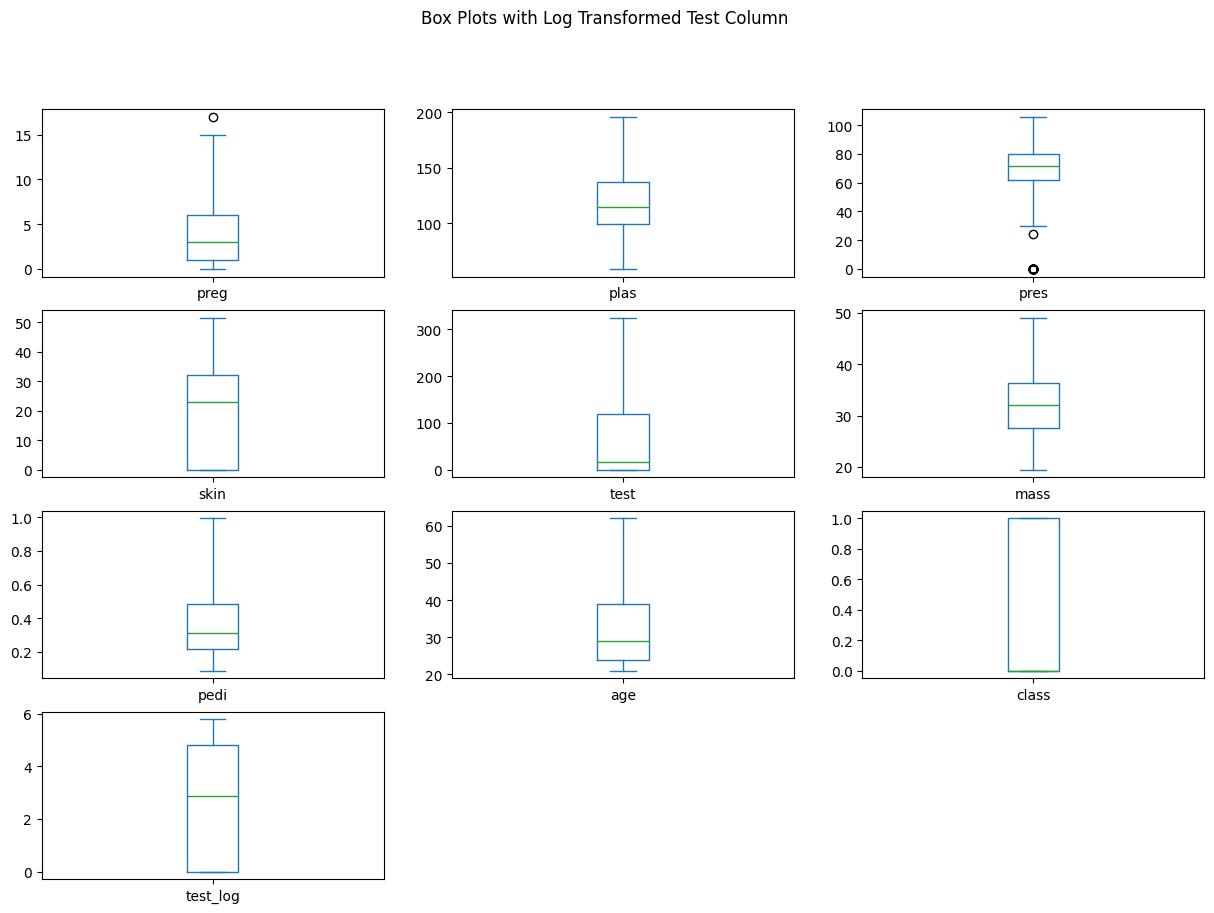

In [178]:
import math

# Calculate the required layout dynamically
num_columns = len(data.columns)
rows = math.ceil(num_columns / 3)

# Plot with a flexible layout
data.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, 10), sharex=False, sharey=False, whis=2.0)
pyplot.suptitle('Box Plots with Log Transformed Test Column')
pyplot.show()


    These boxplots look pretty good! It seems we have very few outliers that escaped our grasp, but that is alright because the outliers were so few that our data was not affected by it! 

<br>

## **MULTIVARIATE PLOTS**

### **CORRELATION MATRIX PLOT**

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change  in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

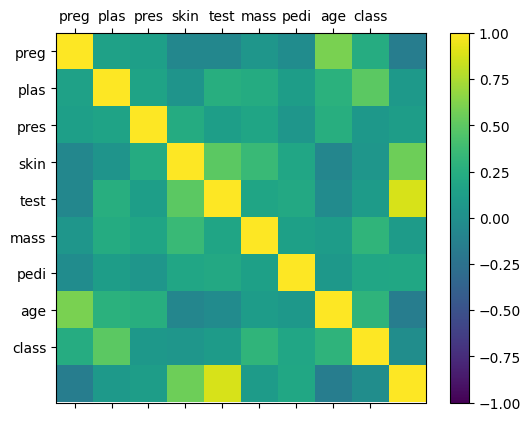

In [181]:
# Using pyplot, pandas, and numpy library here
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(headers)
ax.set_yticklabels(headers)
pyplot.show()

The heatmap gives valuable insights such as: 

1. **Strong Correlation Between Glucose (plas) and Diabetes (class)**:  
   - The glucose concentration (`plas`) shows a strong positive correlation with the diabetes class label (`class`). This is expected as higher blood sugar levels are a significant indicator of diabetes.

2. **Age and Pregnancies Correlation**:  
   - There is a strong positive correlation between `preg` (number of pregnancies) and `age`, which is natural since older individuals are more likely to have had multiple pregnancies.

3. **Skin Thickness (skin) and Insulin (test)**:  
   - A noticeable correlation exists between `skin` (triceps skinfold thickness) and `test` (2-hour serum insulin). Higher skinfold thickness often indicates higher insulin resistance, a key factor in the onset of diabetes.

4. **BMI (mass) and Diabetes**:  
   - BMI (`mass`) has a moderate positive correlation with the diabetes class (`class`). Obesity is a well-known risk factor for Type 2 diabetes, making this correlation significant for diagnosis and prediction.

5. **Weak Correlation of Blood Pressure (pres)**:  
   - Diastolic blood pressure (`pres`) does not show a strong correlation with diabetes. While it may still contribute to overall health assessment, it appears to be a weaker predictor of diabetes compared to glucose levels or BMI.

* We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with itself (as you would have expected) in the diagonal line from top left to bottom right. <br><br>
* **Preg and Age seem to be highly correlated**
* **Plas and Test seem to be highly correlated**
* **Mass and Skin seem to be highly correlated**

<br><br>

## **SUMMARY OF PLOTS**

In this section you discovered a number of ways that you can better understand your machine
learning data in Python using Pandas. Specifically, you learned how to plot your data using:

1. Box and Whisker Plots.
2. Correlation Matrix Plot.

But there are so many more including:

1. Histograms.
2. Density Plots.
3. Scatter Plot Matrix.

        Let's move onto the last section of our data work flow prep...
<br><br>

## **STEP 3.0 PREPARE YOUR DATA FOR MACHINE LEARNING**

Many machine learning algorithms make assumptions about your data. It is often a very good
idea to prepare your data in such a way to best expose the structure of the problem to the
machine learning algorithms that you intend to use. In this chapter you will discover how to prepare your data for machine learning in Python using scikit-learn. After completing this lesson you will know how to: <br>
1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data.

        Let’s get started.

<br>

### **RESCALE DATA**

When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. <br>**You can rescale your data using scikit-learn using the MinMaxScaler class**

In [182]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data.to_numpy()
# separate array into input and output components
# ignoring the "class" variable
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.65  0.679 0.679 0.    0.478 0.44  0.707]
 [0.059 0.191 0.623 0.562 0.    0.241 0.234 0.244]
 [0.471 0.905 0.604 0.    0.    0.13  0.47  0.268]
 [0.059 0.221 0.623 0.446 0.289 0.292 0.072 0.   ]
 [0.    0.57  0.377 0.679 0.517 0.798 1.    0.293]]


We applied **MinMaxScaler** to rescale all numeric features to a range between **0 and 1**. This ensures that all variables are on a similar scale, preventing features with larger magnitudes from dominating the learning process. Rescaling improves the performance and convergence speed of machine learning algorithms, especially those using gradient descent. It also makes data visualization clearer and more interpretable. Additionally, scaled data is better suited for models like SVM, KNN, and neural networks.

<br>

### **STANDARDIZE DATA**


**Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1**. <br><br>It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis. <br>**You can standardize data using scikit-learn with the StandardScaler class**

In [183]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array = data.to_numpy()

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.635  0.956  0.164  0.946 -0.8    0.208  0.635  1.717]
 [-0.834 -1.15  -0.146  0.56  -0.8   -0.87  -0.325 -0.121]
 [ 1.223  2.126 -0.249 -1.308 -0.8   -1.378  0.776 -0.024]
 [-0.834 -1.016 -0.146  0.173  0.351 -0.639 -1.081 -1.088]
 [-1.128  0.588 -1.49   0.946  1.257  1.67   3.247  0.073]]


In this step, we applied **StandardScaler** to standardize the data by transforming it to have a **mean of 0** and a **standard deviation of 1**. Standardization is particularly useful when the data has varying scales or does not follow a uniform distribution. By converting data to a standard Gaussian distribution, it enhances the performance of algorithms that assume normalized data, such as **linear regression** and **logistic regression**. It also helps to reduce the effect of outliers. The transformed data is now centered around zero, making it more suitable for training machine learning models.

    The values for each attribute now have a mean value of 0 and a standard deviation of 1.


<br>

### **NORMALIZE DATA**

**Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1** (called a unit norm or a vector with the length of 1 in linear algebra).  <br><br>This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.**You can normalize data in Python with scikit-learn using the Normalizer** class

In [184]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

array = data.to_numpy()

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.003 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.004 0.144]]


In this step, we applied **Normalization** using the `Normalizer` class in scikit-learn. Normalization rescales each observation (row) to have a unit norm (length of 1). This is particularly helpful when using algorithms that are sensitive to the magnitude of data, such as **k-Nearest Neighbors (kNN)** or **Neural Networks**. By scaling the data to a uniform range, normalization reduces bias introduced by varying feature scales and ensures better convergence during training. It is also beneficial for datasets with sparse values, as it emphasizes relative differences in values rather than absolute magnitudes.

<br>

### **BINARIZE DATA**

You can transform your data using a binary threshold. **All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data.**<br><br> It can be useful when you have probabilities that you want to make into crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful. <br> **You can create new binary attributes in Python using scikit-learn with the Binarizer class**

In [185]:
# binarization
from sklearn.preprocessing import Binarizer

array = data.to_numpy()

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])


[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


This process is especially useful when you want to create a simpler dataset or extract meaningful binary features for algorithms that benefit from categorical or binary data, such as logistic regression or decision trees. Additionally, it can enhance interpretability and reduce the impact of extreme outliers in certain datasets.

**Lets try a simple Logistic Regression model from the data we cleaned**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = data.drop('class', axis=1)

# Ensure the target variable contains only discrete values
y = data['class'].apply(lambda x: 1 if x >= 0.5 else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.786046511627907

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       139
           1       0.73      0.63      0.68        76

    accuracy                           0.79       215
   macro avg       0.77      0.75      0.76       215
weighted avg       0.78      0.79      0.78       215


Confusion Matrix:
 [[121  18]
 [ 28  48]]



### **Data Cleaning and Its Impact on Model Performance**

In this project, the primary goal was to clean and preprocess the data to ensure it was suitable for building a robust machine learning model. Data cleaning involved several critical steps, starting with identifying and addressing missing values. Rows with null values were either removed or imputed using appropriate statistical measures like median or mean values. Additionally, duplicate entries were detected and removed to prevent biased model training.

Next, zero values in critical columns like **mass** and **age** were handled using median imputation to ensure more realistic data representation. Outliers, particularly in the **test** and **pedi** columns, were identified using boxplots and treated using log transformations and Interquartile Range (IQR) methods. These transformations effectively reduced the impact of extreme values, bringing the distributions closer to normal and making the data more suitable for model training.

After transformations, normalization and standardization were applied to scale the data for better model performance. These techniques ensured that features with different scales did not disproportionately influence the model. Additionally, feature engineering techniques like binarization helped in creating simplified features for certain scenarios.

---

### **Impact of Clean Data on Model Performance**

The cleaned dataset was then used to build a **Logistic Regression** model, which resulted in an accuracy of **78.60%**. The model achieved a **precision of 0.81** for class 0 and **0.73** for class 1, with corresponding recall values of **0.87** and **0.63**. This balance between precision and recall indicates that the model effectively captured patterns in both the diabetic and non-diabetic classes.

The confusion matrix further highlighted the model’s strong classification ability, with **121 true positives** and **48 true negatives**. While the model did misclassify some cases (**28 false negatives** and **18 false positives**), the overall results suggest that the cleaned data contributed significantly to the model’s reliability.

---

    You can see that all values equal or less than 0 are marked 0 and all of those above 0 are marked 1

<br><br>

In [194]:
import pandas as pd


output_path = 'cleaned_data.csv'

# Format all numeric columns to two decimal places
data = data.round(2)

# Save to CSV
data.to_csv(output_path, index=False)

print(f"Cleaned data saved to '{output_path}'.")


Cleaned data saved to 'cleaned_data.csv'.


## Doing some Analysis using visual plots and graphs.

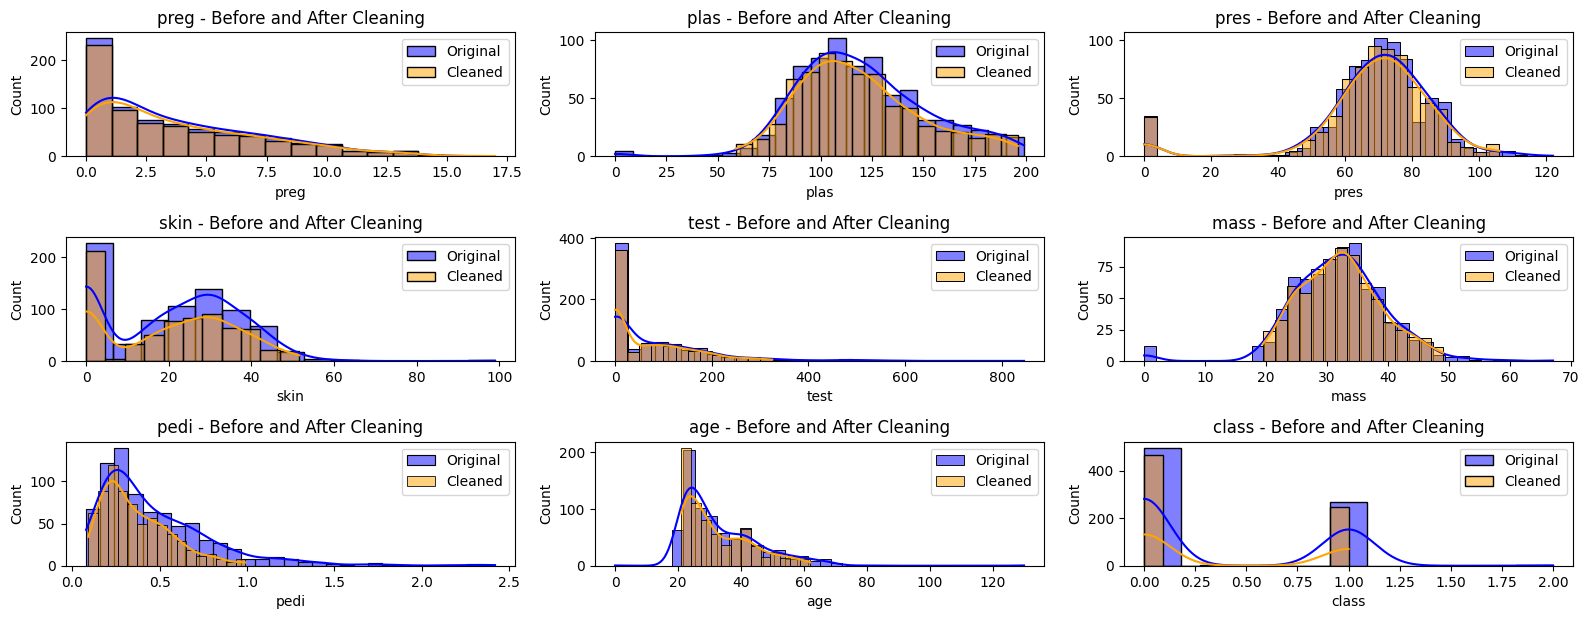

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original and cleaned datasets
original_data = pd.read_csv('Akime-O_odham-diabetes.data.csv')
cleaned_data = pd.read_csv('cleaned_data.csv')

# Select numerical columns for comparison
numerical_cols = original_data.select_dtypes(include=['float64', 'int64']).columns

# Plot Histograms Before and After Cleaning
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.histplot(original_data[col], color='blue', label='Original', kde=True, alpha=0.5)
    sns.histplot(cleaned_data[col], color='orange', label='Cleaned', kde=True, alpha=0.5)
    plt.title(f'{col} - Before and After Cleaning')
    plt.legend()
plt.tight_layout()
plt.show()


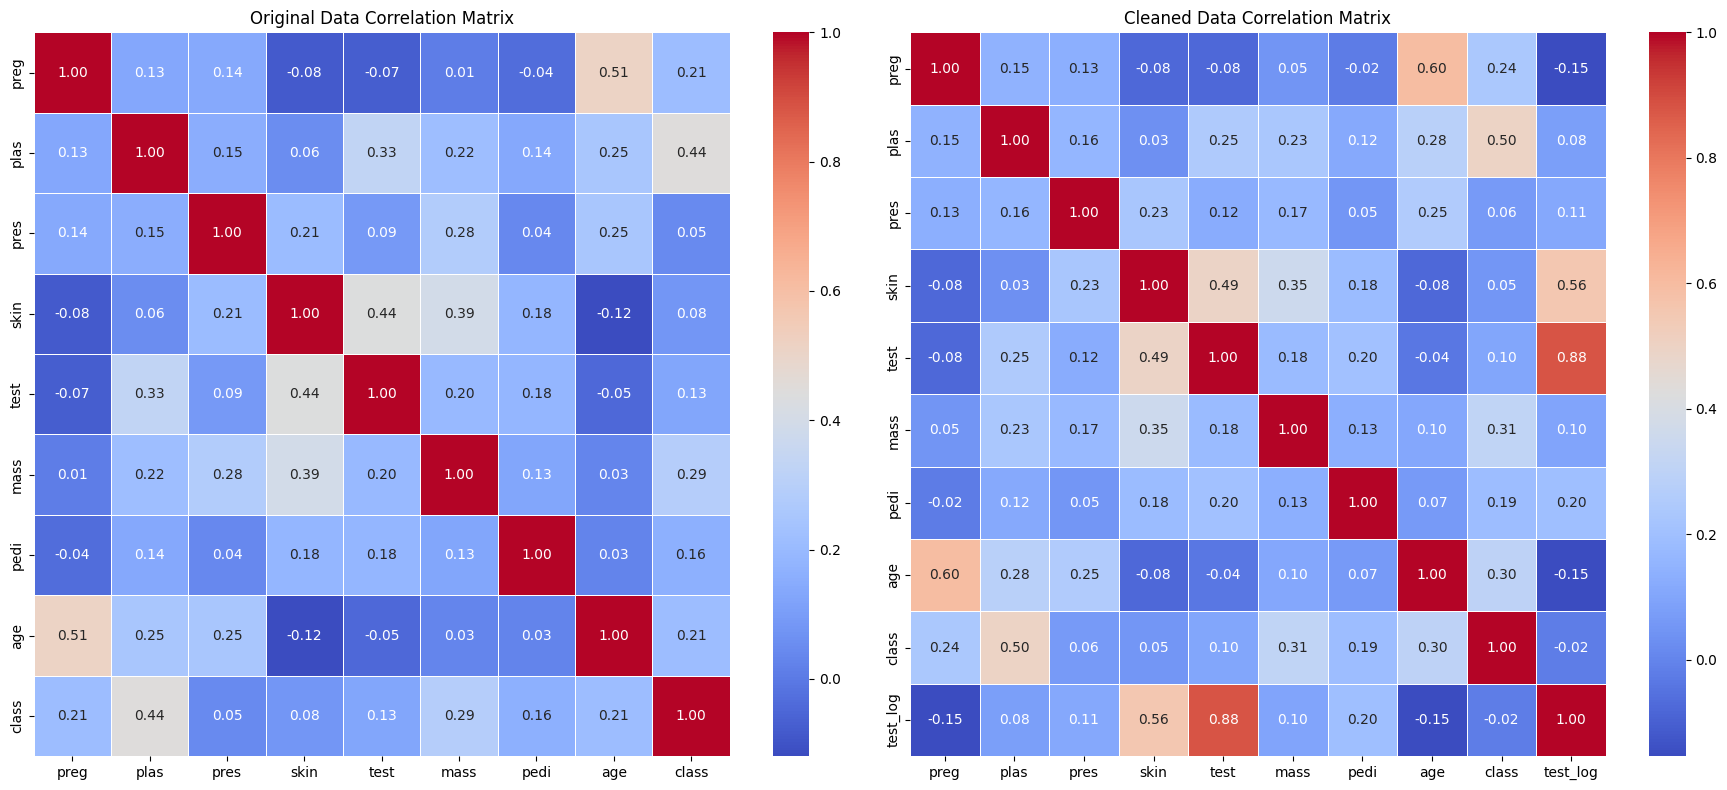

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original and cleaned datasets
original_data = pd.read_csv('Akime-O_odham-diabetes.data.csv')
cleaned_data = pd.read_csv('cleaned_data.csv')

# Compute correlation matrices
original_corr = original_data.corr()
cleaned_corr = cleaned_data.corr()

# Plot correlation matrix heatmaps
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Original data correlation matrix
sns.heatmap(original_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, ax=axs[0])
axs[0].set_title('Original Data Correlation Matrix')

# Cleaned data correlation matrix
sns.heatmap(cleaned_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, ax=axs[1])
axs[1].set_title('Cleaned Data Correlation Matrix')

plt.tight_layout()
plt.show()


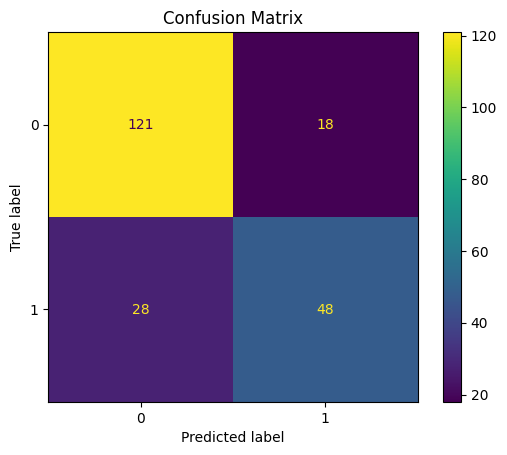

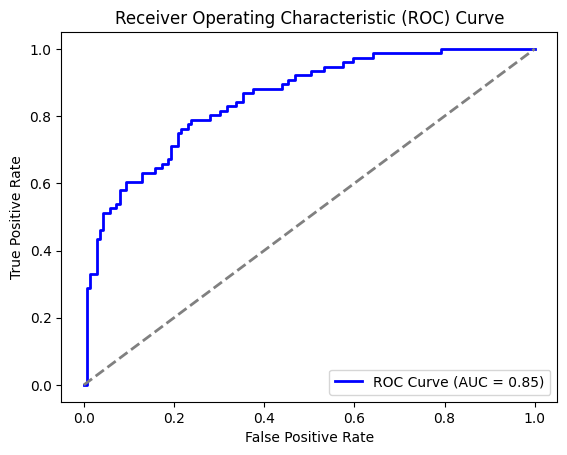

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
cleaned_data = pd.read_csv('cleaned_data.csv')

# Separate features and target
X = cleaned_data.drop('class', axis=1)

# Binarize the target variable (convert continuous values to discrete classes)
y = cleaned_data['class'].apply(lambda x: 1 if x >= 0.5 else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
display.plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## **SUMMARY OF PREPARING YOUR DATA FOR MACHINE LEARNING**

In this chapter you discovered how you can prepare your data for machine learning in Python
using scikit-learn. You now have recipes to:
* Rescale data.
* Standardize data.
* Normalize data.
* Binarize data.

**STAY TUNED**...

    You now know how to transform your data to best expose the structure of your problem to the modeling algorithms. In the next lesson you will discover how to select the features of your data that are most relevant to making predictions.

<br>

*You have reached the end of this Jupyter Notebook. If you wish to go back to the Table of Contents, please click **[here](#table-of-contents)**!*